In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import PIL

In [3]:
# !pip install     numpy datetime tensorflow math natsort glob matplotlib sklearn

In [1]:
import os
import cv2
from PIL import Image
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from math import ceil, sqrt
import natsort
import glob
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences


/home/kirtan/.conda/envs/crossway/lib/python3.9/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


In [2]:
import tensorflow

In [2]:
print(tf.config.experimental.list_physical_devices())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


we will set `Numpy`, `Python`, and `Tensorflow` seeds to get consistent results on every execution.

In [2]:
seed_constant = 42
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)


NameError: name 'np' is not defined

### Preprocess

#### Importing data 

In [4]:
path_videos = '/home/kirtan/Documents/FYProject/archive/Videos/Videos/'
path_frames = '/home/kirtan/Documents/FYProject/archive/Videos/Frames/'
# checkpoint_path = "./checkpoints/"

#### Splitting the data

In [5]:
x = np.arange(1, 105)
np.random.shuffle(x)
videos_validation = x[:16]
videos_test = x[16: 16+22]
videos_train = x[16+22:]

In [6]:
print(videos_train, len(videos_train))
print(videos_test, len(videos_test))
print(videos_validation, len(videos_validation))


[ 57  40  36  17  67  35   8  44  69  70  28  20  85  26  74  50  14  25
   4  18  39   9  82   7  68  37  91  84  55  51  71  47 100  62 101  97
  42  59  49  90  58  76  33  98  60  64 102  38  30   2  53  22   3  24
  88  95  75  87  83  21  61  72  15  93  52 103] 66
[ 81  34  13  27  99  56  23  77  45  73  16  43  41  10  86  12 104  79
  29  80   6  63] 22
[31 66 65 54 46 94 92 48 11  1 19 32 89 96 78  5] 16


In [7]:
filenames_train = []
labels_train = []
filenames_validation = []
labels_validation = []
filenames_test = []
labels_test = []

In [8]:
# max_seq_length = 779 

# for vid in videos_train:
#     folder = path_frames + "video{}/".format(vid)
#     frames = glob.glob(folder + 'frame*.jpg')
#     frames = natsort.natsorted(frames)
#     filenames_train = np.append(filenames_train,frames)
#     labels_path = path_frames + "video{}/".format(vid) + "labels{}.npy".format(vid)
#     labels_array = np.load(labels_path)
#     labels_list = list(labels_array)
#     labels_train = np.append(labels_train,labels_list)
# filenames_train = np.array(filenames_train)
# labels_train = np.asarray(labels_train).astype('float32').reshape((-1,1))

# # print(type(filenames_train))
# # # # //changes
# # # # Pad or truncate input sequences
# # filenames_train = pad_sequences(filenames_train, maxlen=max_seq_length, padding='post', truncating='post',dtype='str')

# # # # Pad or truncate label sequences
# # labels_train = pad_sequences(labels_train, maxlen=max_seq_length, padding='post', truncating='post',dtype='float32')



# for vid in videos_test:
#     folder = path_frames + "video{}/".format(vid)
#     frames = glob.glob(folder + 'frame*.jpg')
#     frames = natsort.natsorted(frames)
#     filenames_test = np.append(filenames_test,frames)
#     labels_path = path_frames + "video{}/".format(vid) + "labels{}.npy".format(vid)
#     labels_array = np.load(labels_path)
#     labels_list = list(labels_array)
#     labels_test = np.append(labels_test,labels_list)
# filenames_test = np.array(filenames_test)
# labels_test = np.asarray(labels_test).astype('float32').reshape((-1,1))

# # //changes
# # # Pad or truncate input sequences
# # filenames_test = pad_sequences(filenames_test, maxlen=max_seq_length, padding='post', truncating='post',dtype='str')

# # Pad or truncate label sequences
# # labels_test = pad_sequences(labels_test, maxlen=max_seq_length, padding='post', truncating='post',dtype='float32')


# for vid in videos_validation:
#     folder = path_frames + "video{}/".format(vid)
#     frames = glob.glob(folder + 'frame*.jpg')
#     frames = natsort.natsorted(frames)
#     filenames_validation = np.append(filenames_validation,frames)
#     labels_path = path_frames + "video{}/".format(vid) + "labels{}.npy".format(vid)
#     labels_array = np.load(labels_path)
#     labels_list = list(labels_array)
#     labels_list = np.asarray(labels_list).astype('float32').reshape((-1,1))
#     labels_validation = np.append(labels_validation,labels_list)

# filenames_validation = np.array(filenames_validation)
# labels_validation = np.asarray(labels_validation).astype('float32').reshape((-1,1))


# #//changes
# # # Pad or truncate input sequences
# # filenames_validation = pad_sequences(filenames_validation, maxlen=max_seq_length, padding='post', truncating='post',dtype='str')

# # # # Pad or truncate label sequences
# # labels_validation = pad_sequences(labels_validation, maxlen=max_seq_length, padding='post', truncating='post',dtype='float32')

# # #//changes
# # # Pad or truncate input sequences
# # filenames_train = pad_sequences(filenames_train, maxlen=max_seq_length, padding='post', truncating='post')

# # # Pad or truncate label sequences
# # labels_train = pad_sequences(labels_train, maxlen=max_seq_length, padding='post', truncating='post')

for vid in videos_train:
    folder = path_frames + "video{}/".format(vid)
    frames = glob.glob(folder + 'frame*.jpg')
    frames = natsort.natsorted(frames)
    filenames_train = np.append(filenames_train,frames)
    labels_path = path_frames + "video{}/".format(vid) + "labels{}.npy".format(vid)
    labels_array = np.load(labels_path)
    labels_list = list(labels_array)
    labels_train = np.append(labels_train,labels_list)

filenames_train = np.array(filenames_train)
labels_validation = np.array(labels_validation)

for vid in videos_test:
    folder = path_frames + "video{}/".format(vid)
    frames = glob.glob(folder + 'frame*.jpg')
    frames = natsort.natsorted(frames)
    filenames_test = np.append(filenames_test,frames)
    labels_path = path_frames + "video{}/".format(vid) + "labels{}.npy".format(vid)
    labels_array = np.load(labels_path)
    labels_list = list(labels_array)
    labels_list = np.asarray(labels_list).astype('float32').reshape((-1,1))
    labels_test = np.append(labels_test,labels_list)
#     labels_test.append(labels_list)

filenames_test = np.array(filenames_test)
labels_validation = np.array(labels_validation)
# labels_test = np.asarray(labels_test).astype('float32').reshape((-1,1))

for vid in videos_validation:
    folder = path_frames + "video{}/".format(vid)
    frames = glob.glob(folder + 'frame*.jpg')
    frames = natsort.natsorted(frames)
    filenames_validation = np.append(filenames_validation,frames)
#     filenames_validation.append(frames)
    labels_path = path_frames + "video{}/".format(vid) + "labels{}.npy".format(vid)
    labels_array = np.load(labels_path)
    labels_list = list(labels_array)
    labels_list = np.asarray(labels_list).astype('float32').reshape((-1,1))
    labels_validation = np.append(labels_validation,labels_list)
#     labels_validation.append(labels_list)


filenames_validation = np.array(filenames_validation)
labels_validation = np.array(labels_validation)
# labels_validation = np.asarray(labels_validation).astype('float32').reshape((-1,1))




In [9]:
print(labels_validation.shape)

(4200,)


In [15]:
# print(labels_train)
# y_train = np.asarray(labels_train).astype('float32').reshape((-1,1))
print(labels_validation)

[0. 0. 0. ... 0. 0. 0.]


In [3]:
print(type(filenames_train), filenames_validation.shape, filenames_test.shape)
print(labels_train.shape, labels_validation.shape, labels_test.shape)


NameError: name 'filenames_train' is not defined

In [11]:
def parse_function(filename, label):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    image = tf.image.resize(image, [64, 64], method=tf.image.ResizeMethod.AREA, 
                            preserve_aspect_ratio=True)
    
    print(image.shape)
    return image, label

def train_preprocess(image, label):
    image = tf.image.random_brightness(image, 0.15)
    image = tf.image.random_contrast(image, 0.8, 1.5)
    image = tf.image.random_saturation(image, 0.6, 3)
    return image, label

In [17]:
# count=0
# # for element in filenames_train:
# #     count+=1
# # print(count)
# for image in filenames_train:
#     image = Image.open(image)
#     image = np.asarray(image)
#     image = tf.image.decode_jpeg(image)
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     image = tf.image.resize(image, [270, 480], method=tf.image.ResizeMethod.AREA, 
#                             preserve_aspect_ratio=True)
#     print(image)
# #     ele = np.reshape(ele,(104,20,ele[0],ele[1],ele[2]))
    
   
#     break

In [18]:
# dataset_train = tf.data.Dataset.from_tensor_slices((filenames_train,labels_train))
# for element in dataset_train.__iter__():
#     print(element)

In [14]:
batch_size = 100 #seq_len

# define padded shapes for input and label
padded_shapes = ([64, 64, 3],[])

# create train dataset
dataset_train = tf.data.Dataset.from_tensor_slices((filenames_train, labels_train))
dataset_train = dataset_train.map(parse_function, num_parallel_calls=tf.data.AUTOTUNE)
dataset_train = dataset_train.map(train_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
dataset_train = dataset_train.padded_batch(batch_size, padded_shapes=padded_shapes,drop_remainder=True)
dataset_train = dataset_train.batch(16,drop_remainder=True)
for batch in dataset_train:
    images, labels = batch
    print('image_len',len(images))
    print('labels_len',labels)
    print('batch',batch)
    break
dataset_train = dataset_train.prefetch(tf.data.AUTOTUNE)

# create test dataset
dataset_test = tf.data.Dataset.from_tensor_slices((filenames_test, labels_test))
dataset_test = dataset_test.map(parse_function, num_parallel_calls=tf.data.AUTOTUNE)
dataset_test = dataset_test.map(train_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
dataset_test = dataset_test.padded_batch(batch_size, padded_shapes=padded_shapes,drop_remainder=True)
dataset_test = dataset_test.batch(16,drop_remainder=True)
dataset_test = dataset_test.prefetch(tf.data.AUTOTUNE)

# create validation dataset
dataset_val = tf.data.Dataset.from_tensor_slices((filenames_validation, labels_validation))
dataset_val = dataset_val.map(parse_function, num_parallel_calls=tf.data.AUTOTUNE)
dataset_val = dataset_val.map(train_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
dataset_val = dataset_val.padded_batch(batch_size, padded_shapes=padded_shapes,drop_remainder=True)
dataset_val = dataset_val.batch(16,drop_remainder=True)
dataset_val = dataset_val.prefetch(tf.data.AUTOTUNE)



(None, None, None)
image_len 16
labels_len tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(16, 100), dtype=float64)
batch (<tf.Tensor: shape=(16, 100, 64, 64, 3), dtype=float32, numpy=
array([[[[[ 4.82816309e-01,  6.79123282e-01,  7.72079170e-01],
          [ 5.17731428e-01,  7.20101953e-01,  8.11102271e-01],
          [ 4.60077196e-01,  6.41683698e-01,  7.20556378e-01],
          ...,
          [-3.14047039e-02, -3.14047039e-02, -3.14047039e-02],
          [-3.26800048e-02, -3.26800048e-02, -3.26800048e-02],
          [-3.26800048e-02, -3.26800048e-02, -3.26800048e-02]],

         [[ 3.15391123e-01,  4.68292713e-01,  5.42558610e-01],
          [ 4.25754815e-01,  5.98618746e-01,  6.47491872e-01],
          [ 3.19735587e-01,  4.58609462e-01,  4.90193129e-01],
          ...,
          [-3.26661766e-02, -3.26661766e-02, -3.26661766e-02],
          [-3.26800048e-02

(None, None, None)
(None, None, None)


In [20]:
# max_seq_length = 779
# padded_filenames_test = []
# padded_labels_test = []

# for filename, label in dataset_test:

#     # Convert filename and label tensors to numpy arrays
#     filename = filename.numpy()
#     label = label.numpy()

#     # Pad or truncate filename sequences
#     filename_padded = pad_sequences(filename, maxlen=max_seq_length, padding='post', truncating='post')
    
#     # Pad or truncate label sequences
#     label_padded = pad_sequences(label, maxlen=max_seq_length, padding='post', truncating='post')
    
#     # Append padded sequences to the lists
#     padded_filenames_test.append(filename_padded)
#     padded_labels_test.append(label_padded)



In [21]:
# # for element in dataset_train.__iter__():
#     print(element)

In [22]:
tf.keras.backend.set_image_data_format('channels_last')
SEQUENCE_LENGTH = 209
IMAGE_HEIGHT,IMAGE_WIDTH = 270, 480


In [23]:
# def create_model():

#     inputs = tf.keras.layers.Input([270, 480, 3])
#     x = tf.keras.layers.BatchNormalization()(inputs)

#     x = tf.keras.layers.Conv2D(32, (7,7), padding='same', activation='relu')(inputs)
#     x = tf.keras.layers.Conv2D(32, (7,7), padding='same', activation='relu')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

#     x = tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu')(x)
#     x = tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

#     x = tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu')(x)
#     x = tf.keras.layers.Conv2D(128  , (5,5), padding='same', activation='relu')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

#     x = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)

#     x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3))(x)
#     x = tf.keras.layers.Dropout(0.4)(x)
#     x = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3))(x)
#     x = tf.keras.layers.Dropout(0.4)(x)
#     outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
#     model = tf.keras.Model(inputs, outputs)

#     return model

In [24]:
# model = create_model()
# model.summary()

In [25]:
# model.compile(
#         loss=tf.keras.losses.BinaryCrossentropy(),
#         optimizer=tf.keras.optimizers.Adam(lr=0.001/5),
#         metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.6, name='binaryAccuracy')])

In [26]:

def create_LRCN_model():
    model = Sequential()

    # Define the Model Architecture.
    ##################################http://localhost:8888/notebooks/Documents/FYProject/FYProject/Model.ipynb#######################################################################################
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same', activation=None, dilation_rate = (3,3),
    use_bias=False),input_shape=(100,64, 64,3)))
    
    model.add(TimeDistributed(ReLU(6.))) 
    
    model.add(TimeDistributed(Conv2D(32, (3,3), padding='same', activation=None, dilation_rate = (3,3),
    use_bias=False)))
    
    model.add(TimeDistributed(ReLU(6.))) 
    
    model.add(TimeDistributed(Dropout(0.3)))
    
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    
    model.add(TimeDistributed(Conv2D(64, (3,3), padding='same', activation=None, dilation_rate = (2,2),
    use_bias=False)))
    
    model.add(TimeDistributed(ReLU(6.))) 
    
    model.add(TimeDistributed(Conv2D(64, (3,3), padding='same', activation=None, dilation_rate = (2,2),
    use_bias=False)))
    
    model.add(TimeDistributed(BatchNormalization()))
    
    model.add(TimeDistributed(ReLU(6.))) 
    
    model.add(TimeDistributed(Dropout(0.3)))
    
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same', activation=None, dilation_rate = (2,2),
    use_bias=False)))
    
    model.add(TimeDistributed(ReLU(6.)))
    
#     model.add(TimeDistributed(Conv2D(128, (3, 3), padding='same', activation=None, dilation_rate = (2,2),
#     use_bias=False)))
    
#     model.add(TimeDistributed(BatchNormalization()))
    
#     model.add(TimeDistributed(ReLU(6.)))
        
#     model.add(TimeDistributed(Dropout(0.3)))
    
#     model.add(TimeDistributed(MaxPooling2D((2, 2))))
    
    model.add(TimeDistributed(Conv2D(128, (3, 3), padding='same', activation=None, use_bias=False)))
    
    model.add(TimeDistributed(BatchNormalization()))
    
    model.add(TimeDistributed(ReLU(6.)))
    
    model.add(TimeDistributed(GlobalAveragePooling2D()))
    
#     model.add(TimeDistributed(Reshape((1, -1))))
    
#     model.add(TimeDistributed(Dropout(0.4)))
                                      
    model.add(LSTM(64, return_sequences=True))
    
#     model.add(TimeDistributed(Flatten(())))

    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation=None, kernel_regularizer=tf.keras.regularizers.l2(1e-3))))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.ReLU(6.)))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.4)))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation=None, kernel_regularizer=tf.keras.regularizers.l2(1e-3))))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.ReLU(6.)))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.4)))

    # Add TimeDistributed output layer
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid')))

    ########################################################################################################################
    
    # Return the constructed LRCN model.
    return model
#     inputs = tf.keras.layers.Input([270, 480, 3])
#     #x = tf.keras.layers.BatchNormalization()(inputs)

#     x = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=None, dilation_rate = (3,3),
#     use_bias=False)(inputs)
#     #x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU(6.)(x)
#     x = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=None, dilation_rate = (3,3),
#     use_bias=False)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU(6.)(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

#     x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=None, dilation_rate = (2,2),
#     use_bias=False)(x)
#     #x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU(6.)(x)
#     x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=None, dilation_rate = (2,2),
#     use_bias=False)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU(6.)(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

#     x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=None, dilation_rate = (2,2),
#     use_bias=False)(x)
#     #x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU(6.)(x)
#     x = tf.keras.layers.Conv2D(128 , (3,3), padding='same', activation=None, dilation_rate = (2,2),
#     use_bias=False)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU(6.)(x)
#     x = tf.keras.layers.Dropout(0.3)(x)
#     x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

#     x = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=None, use_bias=False)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU(6.)(x)
#     x = tf.keras.layers.GlobalAveragePooling2D()(x)

#     x = tf.keras.layers.Dense(64, activation=None, kernel_regularizer=tf.keras.regularizers.l2(1e-3))(x)
#     x = tf.keras.layers.ReLU(6.)(x)
#     x = tf.keras.layers.Dropout(0.4)(x)
#     x = tf.keras.layers.Dense(32, activation=None, kernel_regularizer=tf.keras.regularizers.l2(1e-3))(x)
#     x = tf.keras.layers.ReLU(6.)(x)
#     x = tf.keras.layers.Dropout(0.4)(x)
#     outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
#     model = tf.keras.Model(inputs, outputs)


#     return model
# def create_LRCN_model():
#     model = Sequential()

#     # Define the Model Architecture.
#     ########################################################################################################################
    
#     model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',
#               activation=None,dilation_rate = (3,3),use_bias=False),input_shape=(16,64, 64, 3)))
    
#     model.add(TimeDistributed(ReLU(6.)))
    
#     model.add(TimeDistributed(Conv2D(32, (3,3), padding='same', activation=None, dilation_rate = (3,3),use_bias=False)))
    
#     model.add(TimeDistributed(BatchNormalization()))
    
#     model.add(TimeDistributed(ReLU(6.)))
    
#     model.add(TimeDistributed(Dropout(0.3)))
    
#     model.add(TimeDistributed(MaxPooling2D((2, 2))))
    
#     model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = None,dilation_rate = (2,2),use_bias=False)))
    
#     model.add(TimeDistributed(ReLU(6.)))
    
#     model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = None,dilation_rate = (2,2),use_bias=False)))
    
#     model.add(TimeDistributed(BatchNormalization()))
        
#     model.add(TimeDistributed(ReLU(6.)))
    
#     model.add(TimeDistributed(Dropout(0.3)))
    
#     model.add(TimeDistributed(MaxPooling2D((2, 2))))
    
#     model.add(TimeDistributed(Conv2D(128, (3, 3), padding='same',activation = None,use_bias=False)))
    
#     model.add(TimeDistributed(BatchNormalization()))
    
#     model.add(TimeDistributed(ReLU(6.))) 
    
#     model.add(TimeDistributed(GlobalAveragePooling2D()))
    
# #     model.add(TimeDistributed(Conv2D(64, (3,3), activation = None,kernel_regularizer=tf.keras.regularizers.l2(1e-3))))
    
#     model.add(TimeDistributed(ReLU(6.))) 
    
#     model.add(TimeDistributed(Dropout(0.4)))    
                                      
#     model.add(LSTM(32))
                                      
#     model.add(Dense(1, activation = 'sigmoid'))

#     ########################################################################################################################
    
#     # Return the constructed LRCN model.
#     return model

# #     inputs = tf.keras.layers.Input([270, 480, 3])
# #     #x = tf.keras.layers.BatchNormalization()(inputs)

# #     x = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=None, dilation_rate = (3,3),
# #     use_bias=False)(inputs)
# #     #x = tf.keras.layers.BatchNormalization()(x)
# #     x = tf.keras.layers.ReLU(6.)(x)
# #     x = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=None, dilation_rate = (3,3),
# #     use_bias=False)(x)
# #     x = tf.keras.layers.BatchNormalization()(x)
# #     x = tf.keras.layers.ReLU(6.)(x)
# #     x = tf.keras.layers.Dropout(0.3)(x)
# #     x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

# #     x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=None, dilation_rate = (2,2),
# #     use_bias=False)(x)
# #     #x = tf.keras.layers.BatchNormalization()(x)
# #     x = tf.keras.layers.ReLU(6.)(x)
# #     x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=None, dilation_rate = (2,2),
# #     use_bias=False)(x)
# #     x = tf.keras.layers.BatchNormalization()(x)
# #     x = tf.keras.layers.ReLU(6.)(x)
# #     x = tf.keras.layers.Dropout(0.3)(x)
# #     x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

# #     x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=None, dilation_rate = (2,2),
# #     use_bias=False)(x)
# #     #x = tf.keras.layers.BatchNormalization()(x)
# #     x = tf.keras.layers.ReLU(6.)(x)
# #     x = tf.keras.layers.Conv2D(128 , (3,3), padding='same', activation=None, dilation_rate = (2,2),
# #     use_bias=False)(x)
# #     x = tf.keras.layers.BatchNormalization()(x)
# #     x = tf.keras.layers.ReLU(6.)(x)
# #     x = tf.keras.layers.Dropout(0.3)(x)
# #     x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

# #     x = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=None, use_bias=False)(x)
# #     x = tf.keras.layers.BatchNormalization()(x)
# #     x = tf.keras.layers.ReLU(6.)(x)
# #     x = tf.keras.layers.GlobalAveragePooling2D()(x)

# #     x = tf.keras.layers.Dense(64, activation=None, kernel_regularizer=tf.keras.regularizers.l2(1e-3))(x)
# #     x = tf.keras.layers.ReLU(6.)(x)
# #     x = tf.keras.layers.Dropout(0.4)(x)
# #     x = tf.keras.layers.Dense(32, activation=None, kernel_regularizer=tf.keras.regularizers.l2(1e-3))(x)
# #     x = tf.keras.layers.ReLU(6.)(x)
# #     x = tf.keras.layers.Dropout(0.4)(x)
# #     outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
# #     model = tf.keras.Model(inputs, outputs)


# #     return model

In [27]:
# Construct the required LRCN model.
LRCN_model = create_LRCN_model()

# Display the success message.
print("Model Created Successfully!")

Model Created Successfully!


In [28]:
# pip install git+https://github.com/paulgavrikov/visualkeras

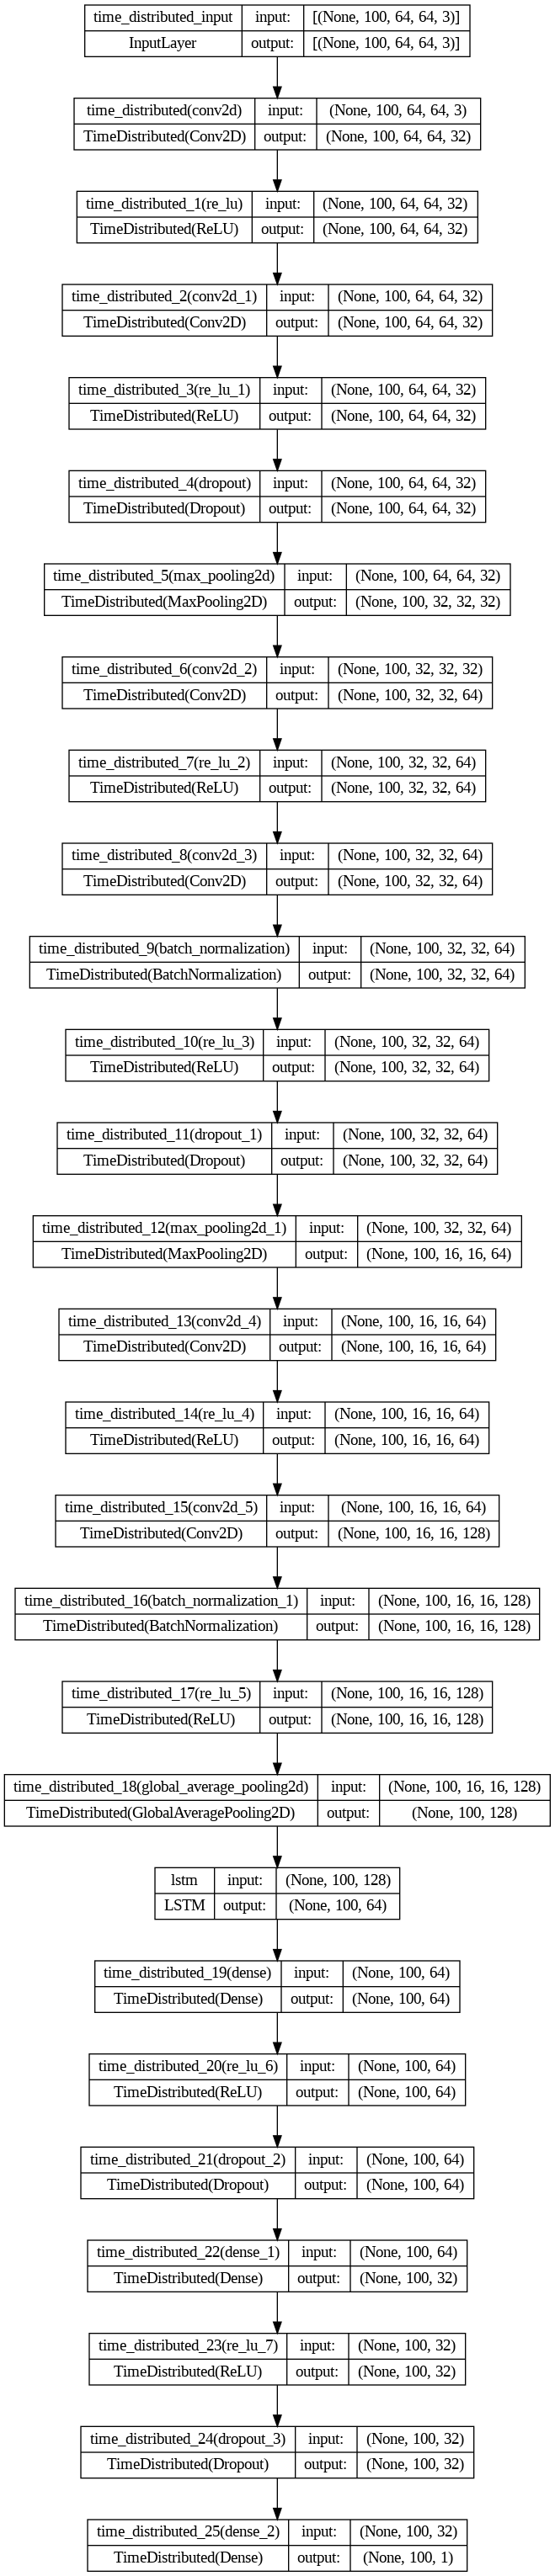

In [29]:
# Plot the structure of the contructed LRCN model.
plot_model(LRCN_model, to_file = 'LRCN_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                   save_weights_only=True, monitor='val_recallAtPrecision', verbose=1, 
#                                                   save_best_only=True, mode='max')
LRCN_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001/5), 
                      metrics=['binary_accuracy',tf.keras.metrics.RecallAtPrecision(precision=0.9, name='recallAtPrecision'), tf.keras.metrics.Recall(),tf.keras.metrics.Precision()],run_eagerly=True)

hist = LRCN_model.fit(x = dataset_train,validation_data=dataset_val,verbose=1, epochs = 100,callbacks = [early_stopping_callback])

Epoch 1/100


 2/10 [=====>........................] - ETA: 27:45 - loss: 0.7845 - binary_accuracy: 0.5634 - recallAtPrecision: 0.0000e+00 - recall: 0.3089 - precision: 0.2382

In [ ]:
# import visualkeras
# from PIL import ImageFont
# visualkeras.layered_view(LRCN_model).show() # display using your system viewer
# visualkeras.layered_view(LRCN_model, to_file='output.png') # write to disk
# visualkeras.layered_view(LRCN_model, to_file='output.png').show() # write and show
# font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
# visualkeras.layered_view(LRCN_model, legend=True, font=font)  # font is optional!